In [174]:
import pandas as pd
import numpy
import requests
import datetime
from datetime import datetime
import time
import matplotlib.pyplot as plt
import math

Dowloading sample data using API

In [122]:
def get_data(date, exchange, coin):
    """ Query the API for 2000 days historical price data starting from "date". """
    url = "https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym=USD&e={}&limit=2000&toTS{}&extraParams=ArbitrageStudy".format(coin,exchange,date)
    r = requests.get(url)
    ipdata = r.json()
    return ipdata

In [156]:
def get_df(from_date, to_date, exchange, coin):
    """ Get historical price data between two dates. """
    date = to_date
    holder = []
    # While the earliest date returned is later than the earliest date requested, keep on querying the API
    # and adding the results to a list. 
    while date > from_date:
        data = get_data(date, exchange,  coin)
        holder.append(pd.DataFrame(data['Data']))
        date = data['TimeFrom']
    # Join together all of the API queries in the list.    
    df = pd.concat(holder, axis = 0)                    
    # Remove data points from before from_date
    df = df[df['time']>from_date]                       
    # Convert timestamp to readable date format
    df['time'] = pd.to_datetime(df['time'], unit='s')   
    # Renaming with Eschange key word
    df.rename(columns={"close":"c{}".format(exchange)}, inplace=True)
    # Make the DataFrame index the time
    df.set_index('time', inplace=True)                  
    # And sort it so its in time order 
    df.sort_index(ascending=False, inplace=True)
    # Dropping unnecessary columns
    df = df.drop(['high','low','open','volumefrom','volumeto'], axis=1)
    return df

In [157]:
ts_from = datetime.timestamp(datetime(2018, 1, 1))
ts_to = datetime.timestamp(datetime(2020, 1, 30))
Coin = 'BTC'
Exch1 = 'Coinbase'
Exch2 = 'Bitfinex'
dfExch1 = get_df(ts_from, ts_to, Exch1, Coin)
dfExch2 = get_df(ts_from, ts_to, Exch2, Coin)

In [181]:
df1 = pd.concat([dfExch1, dfExch2], axis=1)
df1['Ratio'] = (df1.cCoinbase/df1.cCoinbase.shift(1)) / (df1.cBitfinex/df1.cBitfinex.shift(1))

Text(0, 0.5, 'BTC Price Ratio Coinbase/Binance')

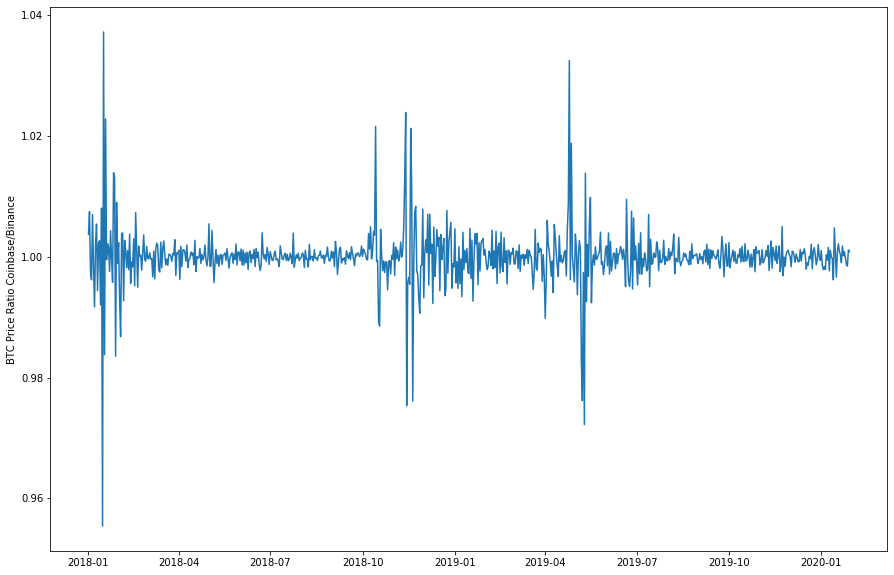

In [184]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df1.Ratio)
ax.set_ylabel('BTC Price Ratio Coinbase/Binance')
#ax.set_xlabel('BTC price')
#ax.legend(['Close'])